## We proudly collaborate with each other, by dedication and hard work in order to create a valuable work that follow scientific and engineering principles 🙏
- Abdullah Elafifi: 20221238
- Mostafa Mahmoud: 20200549
- Youssef Khaled: 20221244
- Osama Husseney: 20221224

## You can sheck our preprocessing steps (EDA and more) via this link:
[Our Data Preprocessing Notebook](https://colab.research.google.com/drive/1ZRM6_V1JWsr_k1cOzl-LdOoEvfg8G7zV?usp=sharing)

# Model_1: Artificial Neural Network Model


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from google.colab import drive
import torch.optim as optim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/LfD_Project/ready_data.csv'

In [ ]:
main_data = pd.read_csv(dataset_path, delimiter=',')

In [ ]:
main_data.columns

Index(['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
main_data.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1.0,1.0,1.00,1.00,0.00,1.00,0.000000,0.000000,0.333333,0.333333,...,0.75,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,6
1,1.0,0.0,0.25,0.25,0.00,0.75,0.000000,0.333333,0.000000,0.333333,...,1.00,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,6
2,0.0,0.0,0.25,0.25,0.00,0.75,1.000000,0.000000,0.000000,0.333333,...,0.75,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,10
3,1.0,0.0,1.00,0.50,0.25,0.50,0.333333,0.000000,0.000000,0.666667,...,0.50,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,15
4,1.0,0.0,0.75,0.75,0.75,0.75,0.333333,0.333333,0.000000,0.333333,...,0.75,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,10


In [ ]:
main_data['Performance'] = pd.cut(main_data['G3'], bins=[-1, 10, 15, 20], labels=[0, 1, 2])
X = main_data.drop(columns=['G3', 'Performance'])
y = main_data['Performance'].astype(int)

In [ ]:
main_data.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Performance
0,1.0,1.0,1.00,1.00,0.00,1.00,0.000000,0.000000,0.333333,0.333333,...,0.50,0.75,0.00,0.00,0.5,0.080000,0.1250,0.315789,6,0
1,1.0,0.0,0.25,0.25,0.00,0.75,0.000000,0.333333,0.000000,0.333333,...,0.50,0.50,0.00,0.00,0.5,0.053333,0.1250,0.263158,6,0
2,0.0,0.0,0.25,0.25,0.00,0.75,1.000000,0.000000,0.000000,0.333333,...,0.50,0.25,0.25,0.50,0.5,0.133333,0.2500,0.421053,10,0
3,1.0,0.0,1.00,0.50,0.25,0.50,0.333333,0.000000,0.000000,0.666667,...,0.25,0.25,0.00,0.00,1.0,0.026667,0.7500,0.736842,15,1
4,1.0,0.0,0.75,0.75,0.75,0.75,0.333333,0.333333,0.000000,0.333333,...,0.50,0.25,0.00,0.25,1.0,0.053333,0.1875,0.526316,10,0


In [ ]:
print(X.dtypes)

famsize       float64
Pstatus       float64
Medu          float64
Fedu          float64
Mjob          float64
Fjob          float64
reason        float64
guardian      float64
traveltime    float64
studytime     float64
failures      float64
schoolsup     float64
famsup        float64
paid          float64
activities    float64
nursery       float64
higher        float64
internet      float64
romantic      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
dtype: object


In [ ]:
print(len(X.columns))
print(X.shape)

28
(395, 28)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
X_test_tensor.shape

torch.Size([103, 28])

In [ ]:
class StudentPerformanceNN(nn.Module):
    def __init__(self, input_size):
        super(StudentPerformanceNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
model = StudentPerformanceNN(input_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        train_preds = torch.argmax(outputs, axis=1)
        train_error = (train_preds != y_train_tensor).float().mean().item()

        test_outputs = model(X_test_tensor)
        test_preds = torch.argmax(test_outputs, axis=1)
        test_error = (test_preds != y_test_tensor).float().mean().item()

print("Epoch " + str(epoch + 1) + "/" + str(epochs) + " - Loss: " + "{:.4f}".format(loss.item()) + ", Train Error: " + "{:.4f}".format(train_error) + ", Test Error: " + "{:.4f}".format(test_error))

Epoch 5/5 - Loss: 1.1075, Train Error: 0.6573, Test Error: 0.5728


In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    correct_predictions = (predicted == y_test_tensor).sum().item()
    total_predictions = y_test_tensor.size(0)
    test_accuracy = (correct_predictions / total_predictions) * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 42.72%


It can be enhanced more!

## Try by using different architecture (be more complex)
Actualy we have a two hidden layers with 64 and 32 neurons only



In [ ]:
class StudentPerformanceModel(nn.Module):
    def __init__(self):
        super(StudentPerformanceModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 3)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.output(x)
        return x

input_size = X_train.shape[1]
model = StudentPerformanceModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        train_preds = torch.argmax(outputs, axis=1)
        train_error = (train_preds != y_train_tensor).float().mean().item()

        test_outputs = model(X_test_tensor)
        test_preds = torch.argmax(test_outputs, axis=1)
        test_error = (test_preds != y_test_tensor).float().mean().item()

print("Epoch " + str(epoch + 1) + "/" + str(epochs) + " - Loss: " + "{:.4f}".format(loss.item()) + ", Train Error: " + "{:.4f}".format(train_error) + ", Test Error: " + "{:.4f}".format(test_error))

Epoch 5/5 - Loss: 1.1302, Train Error: 0.8933, Test Error: 0.8835


Hyperparameters Tuning (esp. Learning rates) with a 10 folds

In [ ]:
k_folds = 10
learning_rates = [0.0001, 0.002, 0.05,0.06,0.065, 0.07,0.1, 0.75, 0.2]
best_lr = None
best_val_loss = float('inf')

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for lr in learning_rates:
    fold_val_losses = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
        X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

        model = StudentPerformanceModel()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = torch.nn.CrossEntropyLoss()

        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            fold_val_losses.append(val_loss.item())

    avg_val_loss = sum(fold_val_losses) / len(fold_val_losses)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_lr = lr

print(best_lr)

0.05


In [ ]:
class StudentPerformanceModel(nn.Module):
    def __init__(self):
        super(StudentPerformanceModel, self).__init__()
        self.fc1 = nn.Linear(28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 3)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.output(x)
        return x

model = StudentPerformanceModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

In [ ]:
def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()

    with torch.no_grad():
        outputs = model(X_test_tensor)

        _, predicted = torch.max(outputs, 1)
        correct = (predicted == y_test_tensor).sum().item()
        accuracy = correct / y_test_tensor.size(0)
    return accuracy

accuracy = evaluate_model(model, X_test_tensor, y_test_tensor)

print(accuracy * 100)

39.80582524271845


#Most enhanced arch.

In [ ]:
class TunedStudentPerformanceModel(nn.Module):
    def __init__(self):
        super(TunedStudentPerformanceModel, self).__init__()

        self.fc1 = nn.Linear(28, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.fc5 = nn.Linear(64, 3)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x1 = self.relu(self.bn1(self.fc1(x)))
        x1 = self.dropout(x1)

        x2 = self.relu(self.bn2(self.fc2(x1)))
        x2 = self.dropout(x2)

        x3 = self.relu(self.bn3(self.fc3(x2)))
        x3 = self.dropout(x3)

        x4 = self.relu(self.bn4(self.fc4(x3)))
        x4 = self.dropout(x4)

        output = self.fc5(x4)
        return output

In [ ]:
batch_size = 16
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = TunedStudentPerformanceModel()
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
optimizer.zero_grad()

To avoid overfitting we use Early Stopping and select a dropout value of 0.4

In [ ]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

best_loss = float('inf')
patience = 10
epochs_no_improve = 0

train_errors = []
test_errors = []

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss /= len(train_loader)
    train_error = (1 - correct_train / total_train) * 100

    train_errors.append(train_error)

    scheduler.step(epoch_loss)

    if epoch_loss < best_loss:
        best_loss = epoch_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_error = (1 - correct_test / total_test) * 100
    test_errors.append(test_error)

accuracy = (correct_test / total_test) * 100
print(f"Final Test Accuracy: {accuracy:.2f}%")

Final Test Accuracy: 83.50%


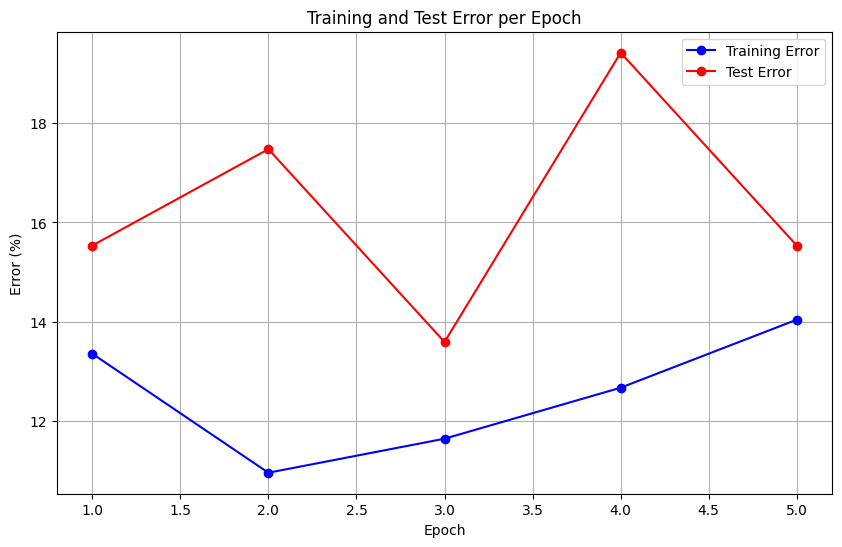

In [ ]:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_errors, label="Training Error", color="blue", marker='o')
plt.plot(epochs_range, test_errors, label="Test Error", color="red", marker='o')

plt.title("Training and Test Error per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Error (%)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

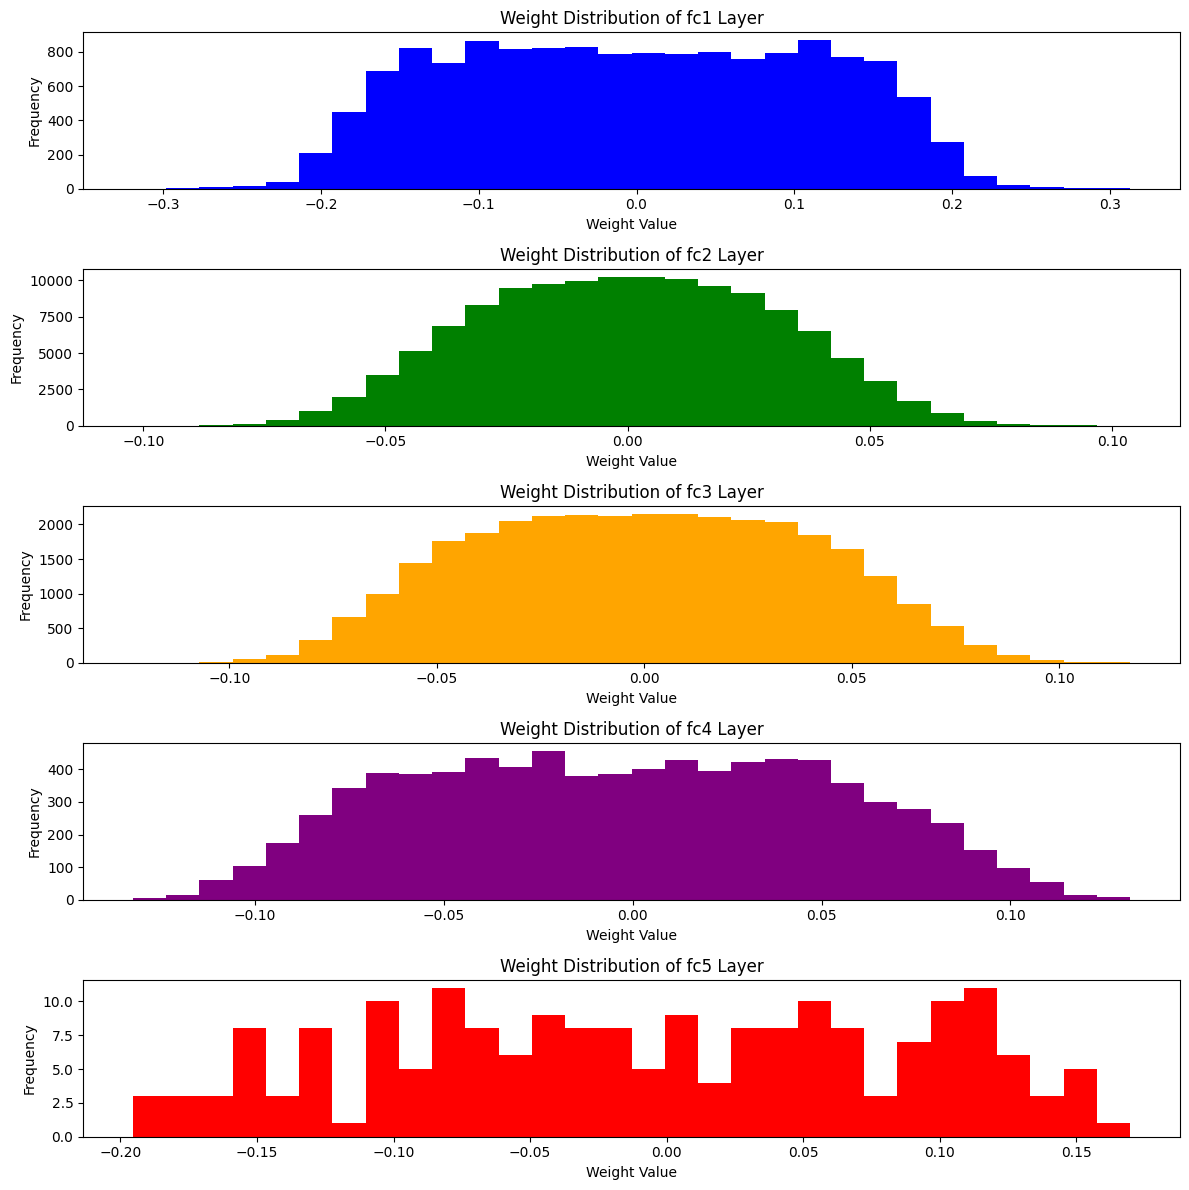

In [ ]:
weights_fc1 = model.fc1.weight.detach().numpy()
weights_fc2 = model.fc2.weight.detach().numpy()
weights_fc3 = model.fc3.weight.detach().numpy()
weights_fc4 = model.fc4.weight.detach().numpy()
weights_fc5 = model.fc5.weight.detach().numpy()

plt.figure(figsize=(12, 12))

plt.subplot(5, 1, 1)
plt.hist(weights_fc1.flatten(), bins=30, color='blue')
plt.title('Weight Distribution of fc1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(5, 1, 2)
plt.hist(weights_fc2.flatten(), bins=30, color='green')
plt.title('Weight Distribution of fc2 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(5, 1, 3)
plt.hist(weights_fc3.flatten(), bins=30, color='orange')
plt.title('Weight Distribution of fc3 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(5, 1, 4)
plt.hist(weights_fc4.flatten(), bins=30, color='purple')
plt.title('Weight Distribution of fc4 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(5, 1, 5)
plt.hist(weights_fc5.flatten(), bins=30, color='red')
plt.title('Weight Distribution of fc5 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

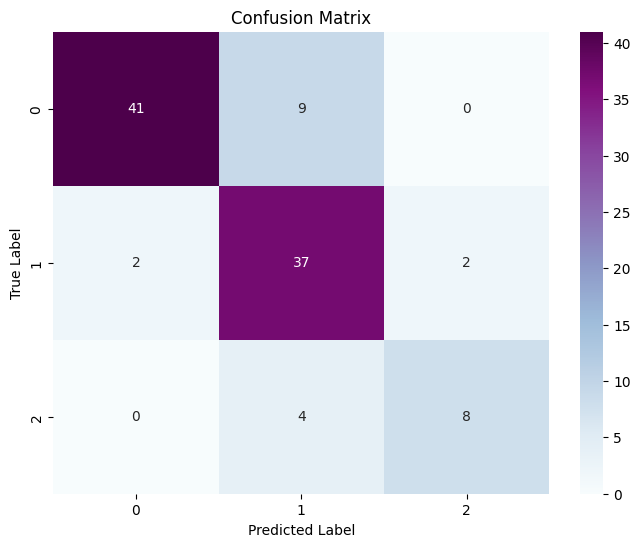

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuPu", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [ ]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred, average='weighted'),
    "Recall": recall_score(y_true, y_pred, average='weighted'),
    "F1 Score": f1_score(y_true, y_pred, average='weighted')
}

for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value * 100:.2f}%")

Accuracy: 83.50%
Precision: 85.06%
Recall: 83.50%
F1 Score: 83.64%


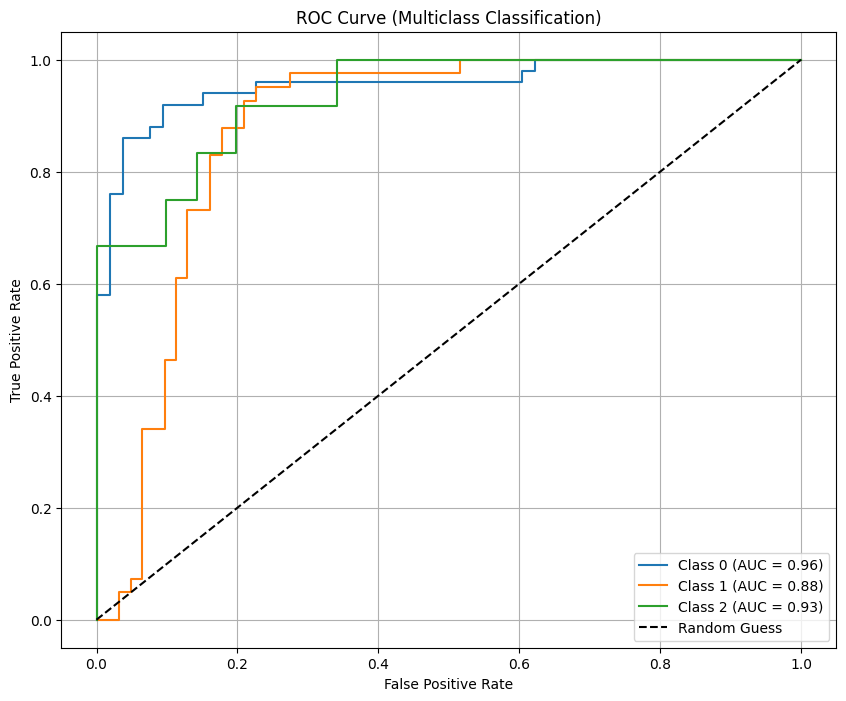

In [ ]:
n_classes = len(np.unique(y_true))
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    y_true_array = np.array(y_true)
    binary_true_labels = (y_true_array == i).astype(int)

    fpr[i], tpr[i], _ = roc_curve(binary_true_labels, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve (Multiclass Classification)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

## Model_2: Support Vector Machine (SVM)

We are trying to understanding the structure and separability of the dataset. We use the PCA to reduce the dataset's dimensionality into 2D.

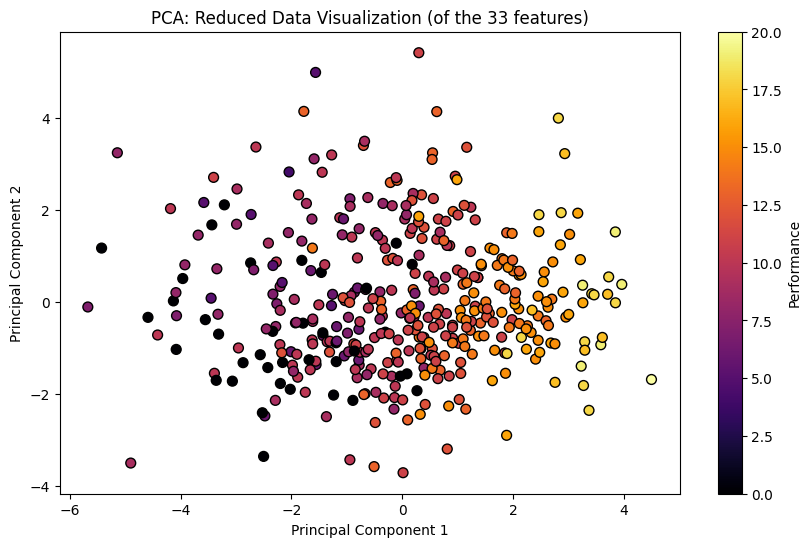

In [ ]:
X = main_data.drop(columns=['G3'])
y = main_data['G3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='inferno', edgecolor='k', s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Reduced Data Visualization (of the 28 features)')
plt.colorbar(scatter, label='Performance')

plt.show()

non-linear generaly dimensionality and gradient and are very close to each other with overlapping classes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_rbf = SVC(kernel='rbf', probability=True)

Hyperparamter Tuning including the cross validation of 10 folds

In [ ]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 100, 1000, 10000],'gamma': [0.001, 0.01, 0.1, 0.5, 1, 'scale', 'auto'], 'tol': [1e-4, 1e-3], 'max_iter': [100, 1000, -1]}

grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=10, n_jobs=-1, verbose=1)
grid_search_rbf.fit(X_train, y_train)


print(grid_search_rbf.best_params_)
print(" cross-validation score", grid_search_rbf.best_score_)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
{'C': 10000, 'gamma': 0.001, 'max_iter': -1, 'tol': 0.0001}
 cross-validation score 0.8668346774193548


In [ ]:
best_model = grid_search_rbf.best_estimator_
y_pred = best_svm_rbf.predict(X_test)

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

In [ ]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred, average='weighted')}

for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value * 100:.2f}%")

Accuracy: 87.34%
Precision: 87.90%
Recall: 87.34%
F1 Score: 87.34%


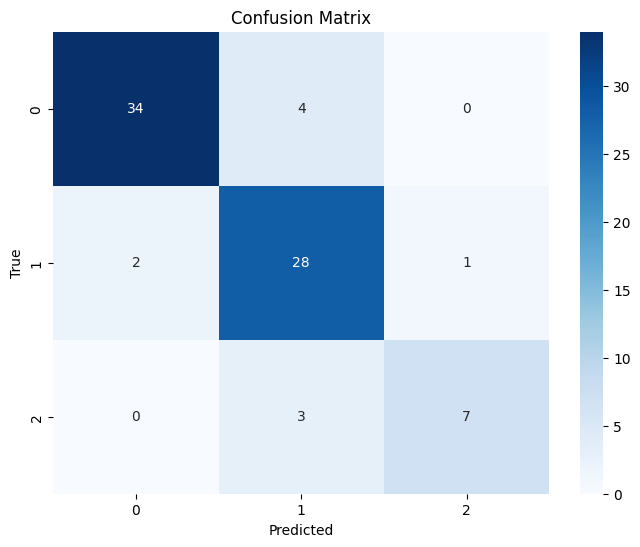

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

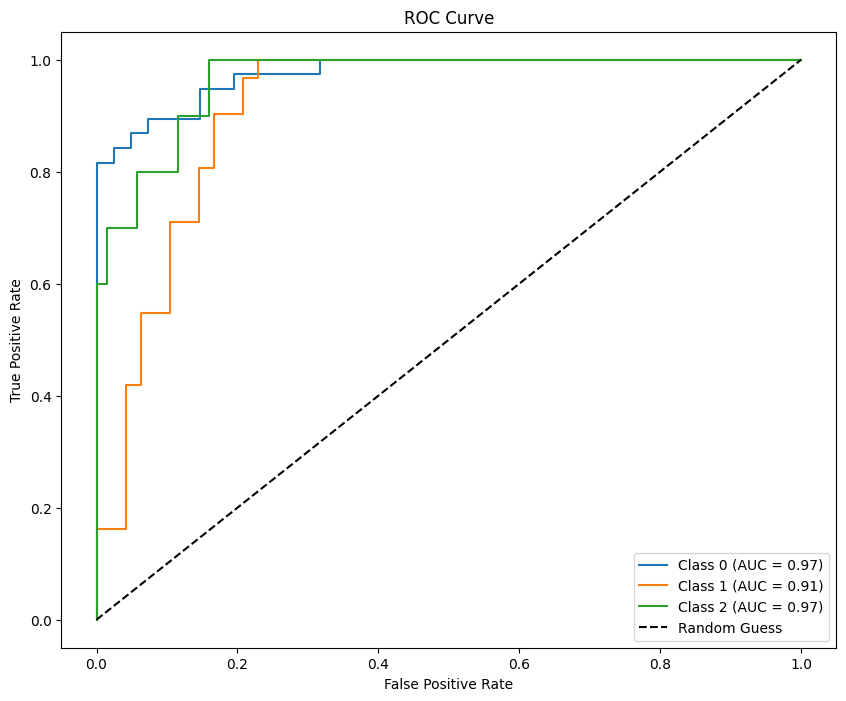

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.show()

Epoch [5/5], Train Error: 9.9315, Test Error: 16.5049


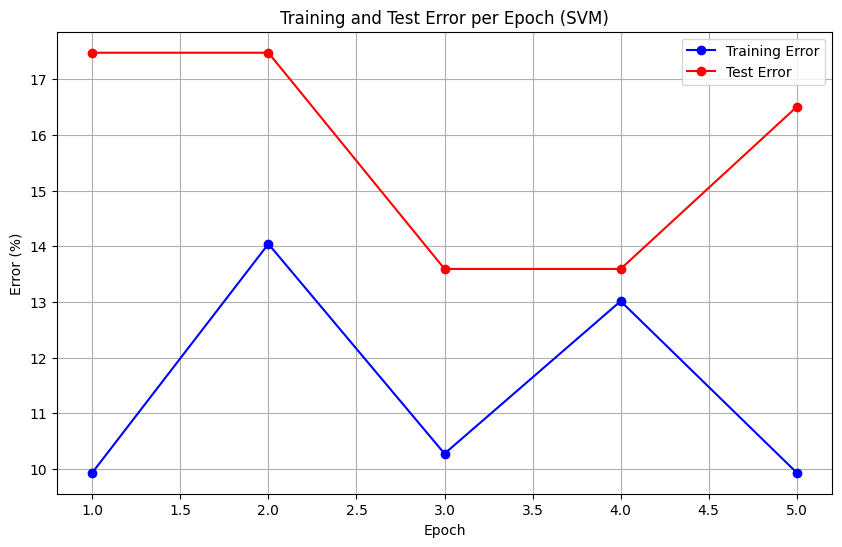

In [ ]:
if (epoch + 1) % 1 == 0:
  print(f"Epoch [{epoch + 1}/{num_epochs}], Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

epochs_range = range(1, epoch + 2)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_errors, label="Training Error", color="blue", marker='o')
plt.plot(epochs_range, test_errors, label="Test Error", color="red", marker='o')

plt.title("Training and Test Error per Epoch (SVM)")
plt.xlabel("Epoch")
plt.ylabel("Error (%)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
